In [1]:
#Importing the necessary libraries to use
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns

plt.style.use('bmh')

In [2]:
# Import the dataset and view the first 5 data 
df = pd.read_csv('boston.csv')
df.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

In [3]:
# Check general info of the dataset 
# We can know the type of the data and the missing value/ NULL value
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


From the info, there is no missing value / NULL value, and the type are numeric
so we don't have to deal with missing value

Since computer are good computing numeric data, so we don't have to alter any type of the data. 

In [4]:
# Lets get the general properties of each features
df.describe()

crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio       black  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            lstat        medv  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

<Axes: >

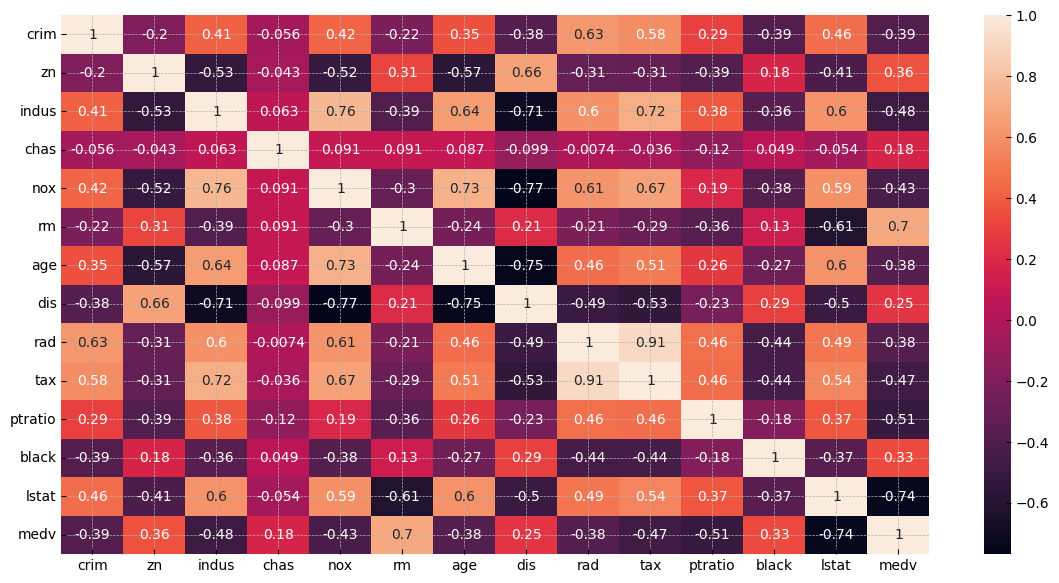

In [5]:
# check the correlation between each feature
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(numeric_only = True),cbar=True,annot=True)

According to the correlation matrix, we see that there are some positive and negative correlation from our features towards our target variable (MEDV)

| Feature | Correlation Value |
| ----------- | ----------- |
| ZN | 0.36 |
| CHAS | 0.16 |
| RM | 0.7 |
| DIS | 0.25 |
| BLACK | 0.33 |
| CHRIM | -0.39 |
| INDUS | -0.48 |
| NOX | -0.43 |
| AGE | -0.38 |
| RAD | -0.38 |
| TAX | -0.47 |
| PTRATIO | -0.51 |
| LSTAT | -0.74 |

Also, there are another interesting insight from the correlation matrix. We found several independent variable which *correlate* with another independent variable. Let's set the threshold >= 0.7 have a high correlation. 

| Feature - Feature | Correlation Value | 
| ----------------- | ----------------- |
| RAD - TAX | 0.91 |
| DIS - NOX | 0.77 |
| NOX - INDUS | 0.76 | 
| DIS - AGE | 0.75 |
| NOX - AGE | 0.73 |
| TAX - INDUS | 0.72 |
| DIS - INDUS | 0.71 |

The one for which concerning is correlation between RAD and TAX, they are too correlated to each other although they are an independent variable. This is not good, since it can affect our model later on. However, the decision to whether we drop one of those columns is from the calculation using **VIF score** later in. 

## Outliers Detection

After check the correlation between each feature, I like to detect outliers. This is important step since outlier can affect our model score later. `Boxplot` is a great visualization to display the outliers

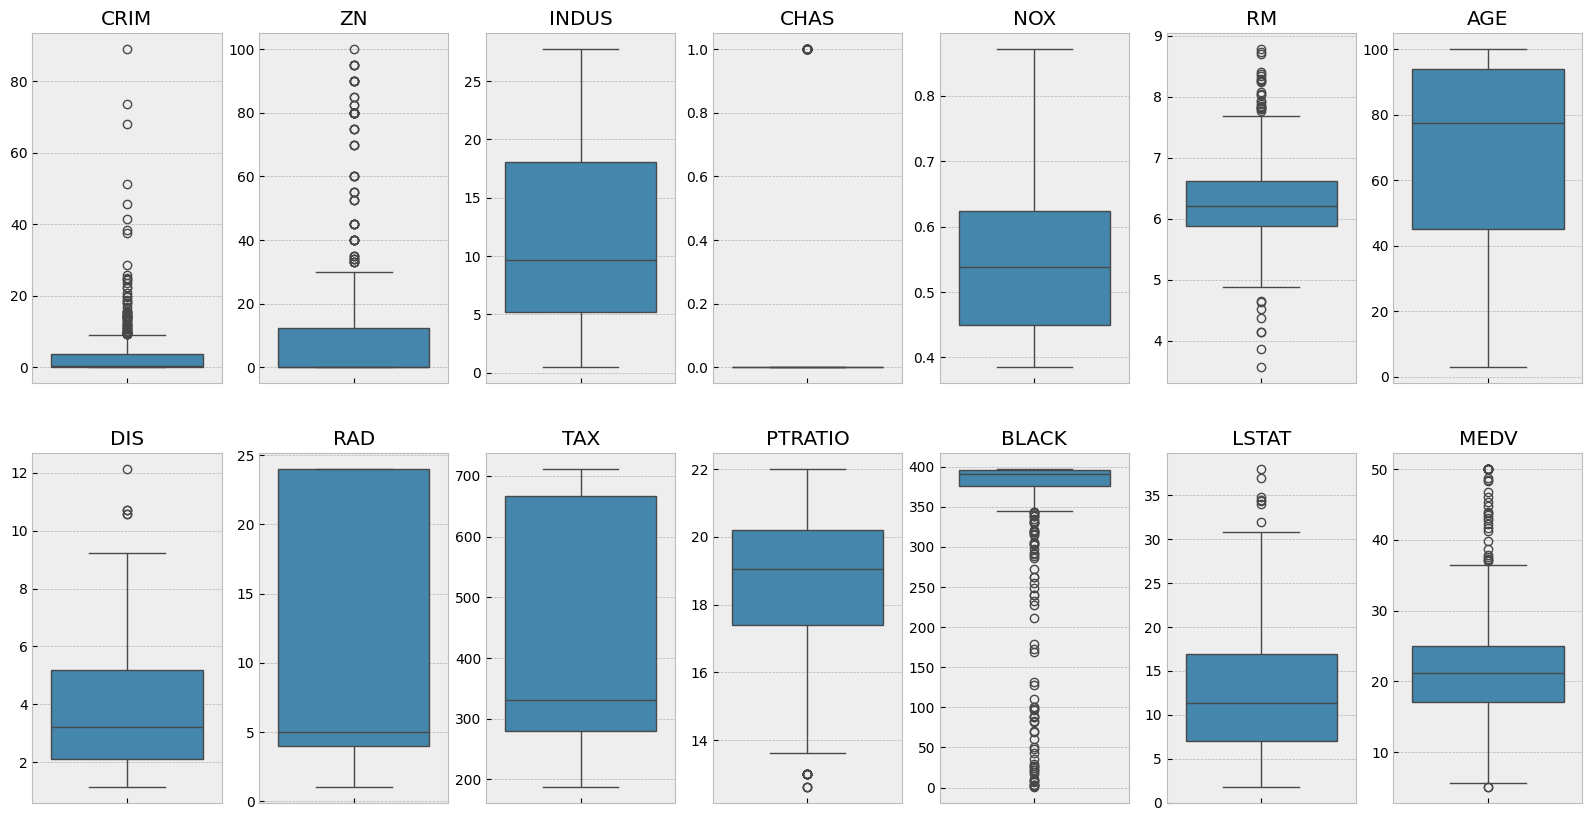

In [6]:
fig, axes = plt.subplots(2,7, figsize=(20,10))

for index, axs in enumerate(axes.flatten()):
    plot = sns.boxplot(data=df, y=df.columns[index], ax=axs)
    plot.set(xlabel='', ylabel='', title=df.columns[index].upper())

It seems from the plots, CRIM, ZN, RM, DIS, PTRATIO, BLACK, LSTAT, and MEDV have a lot of outliers. The question is, how many *a lot* means?

So, let's calculate how many outliers we have in our dataset for each feature by calculating its percentage

In [7]:
def outliers_detection(df):
    outliers_list = []
    
    for col in df.columns:
        percentile25 = df[col].quantile(0.25)
        percentile75 = df[col].quantile(0.75)
        
        IQR  = percentile75 - percentile25
        
        upper_limit = percentile75 + 1.5*IQR
        lower_limit = percentile25 - 1.5*IQR
        
        outliers = df[(df[col] > upper_limit) | (df[col] < lower_limit)]
        percentage = outliers.shape[0] / df.shape[0] * 100
    
        outlier_dict = {'Feature' : col.upper(),
                        'Outlier Percentage' : f'{percentage:.2f}' + '%'}
        
        outliers_list.append(outlier_dict)
    
    # display it using dataframe for better reading
    outlier_df = pd.DataFrame(outliers_list)
    
    return outlier_df
    
outliers = outliers_detection(df)
outliers

Feature Outlier Percentage
0      CRIM             13.04%
1        ZN             13.44%
2     INDUS              0.00%
3      CHAS              6.92%
4       NOX              0.00%
5        RM              5.93%
6       AGE              0.00%
7       DIS              0.99%
8       RAD              0.00%
9       TAX              0.00%
10  PTRATIO              2.96%
11    BLACK             15.22%
12    LSTAT              1.38%
13     MEDV              7.91%

Features with outlier > 5% are concerning. The outliers are too much. This outliers can be caused by many error, it can be measurement error, wrong data collection, or wrong data entry. However, not all the outliers bad. Deleting all the outlier outside the `upper_limit` and `lower_limit` of **interquantile calculation** above is not a good option either, since it can reduce our dimesion too much. The model might find it hard to learn if we have small dimension. So we just need to be a little bit smart how to deal with this outlier.

To deal with this outlier, we should go back to the *note from dataset*, that tell us if the MEDV == 50.00 is censored. Also, I have a suspisious in this note. So, let us remove all the data in ourdataframe of MEDV == 50.00

In [8]:
total_outliers = df[df['medv'] == 50.0].shape[0]
total_dataset = df.shape[0]

percentage = total_outliers/ total_dataset * 100
print('Percentage outliers to be removed : {:.2f}%'.format(percentage))

Percentage outliers to be removed : 3.16%


In [9]:
# remove outliers if medv == 50.00
df = df[~(df['medv'] == 50.0)]

## Hist and RegScatter Plot

So, we have managed our outliers. But, I feel I haven't familiarize with the data yet. To get better understand our data, let us display the data with another visualization technique which are `Histogram` and `Regression-Scatter` Plot. 

Histogram is great to know the frequency of each data, and get sense whether our data are normally distributed or skewed to the right/left.
Regression-Scatter plot is great to understand the linearity relationship between our independent variable (feature) to our target variable

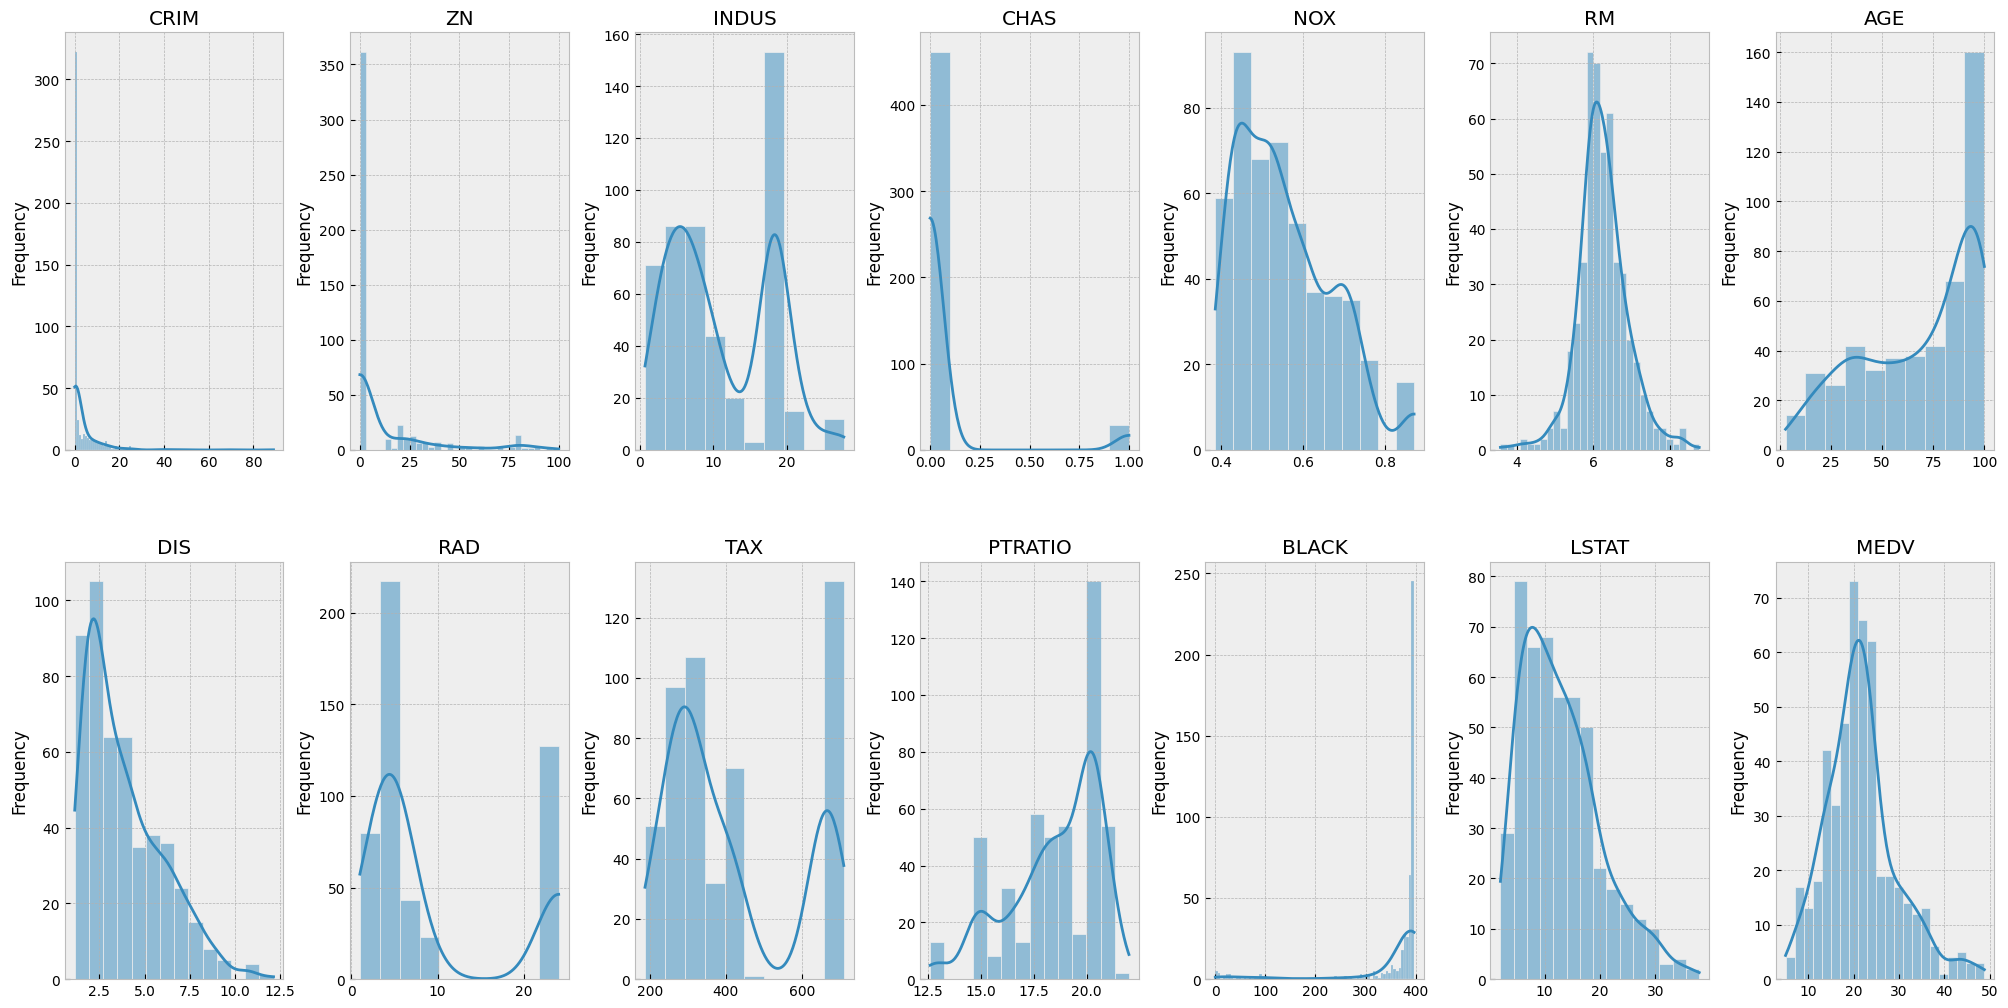

In [10]:
# we plot using seaborn for histplot
fig, axes = plt.subplots(2,7, figsize=(20,10))

for index, axs in enumerate(axes.flatten()):
    plot = sns.histplot(data=df, x=df.columns[index], kde=True, ax=axs)
    plot.set(xlabel='', ylabel='Frequency', title=df.columns[index].upper())
    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

As we can see on the graph above, the feature which normally distributed is only RM. Column MEDV is a litlle bit skewed to the left, but show a normal distribution properties.

Other features show either they're skewed to the left or to the right

In [11]:
# this plot is for regplot
features_cols = df.columns[:-1]

fig, axes = plt.subplots(2,7, figsize=(20,10))

for index, axs in enumerate(axes.flatten()[:len(features_cols)]):
    plot = sns.regplot(x=features_cols[index], y='medv', data=df, ax=axs)
    plot.set(xlabel='', ylabel='Median value of Homes', title=features_cols[index].upper())
    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

From Regplot, we obtain some insight. 

1. Feature RM and LSTAT have a high linearity relationship with our target variable. This also showed by high correlation value before, they correlate with +0.7 and -0.74 respectively. This mean RM and LSTAT are very important feature to predict our target value.
2. CHAS seems not good to view it using `Regplot` since the value is only 1.0 and 0.0, a binary value.
3. The other feature, even though are not show high correlation score toward MEDV, but still show us a linearity relationship with our target variable.

## Data Preparation

In [12]:
feature = df.drop(columns='medv')

#drop feature rad since it contribute a lot to collinearity, has 0.91 correlation with tax
feature = feature.drop(columns = 'rad', axis=1)

target = df['medv']

In [13]:
# Check multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

def calculate_vif(feature):
    
    X = add_constant(feature)
    vif_df = pd.DataFrame([vif(X.values, i) for i in range(X.shape[1])], 
                          index = X.columns).reset_index()
    vif_df.columns = ['feature', 'vif_score']
    vif_df = vif_df.loc[vif_df.feature != 'const']
    return vif_df

calculate_vif(feature)

feature  vif_score
1      crim   1.660929
2        zn   2.258495
3     indus   3.730526
4      chas   1.051111
5       nox   4.313545
6        rm   1.830758
7       age   3.095327
8       dis   3.976043
9       tax   3.402420
10  ptratio   1.659440
11    black   1.340941
12    lstat   3.130697

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature, 
                                                    target,
                                                    test_size = 0.25,
                                                    random_state = 42)

#Check the shape of the train and test 

# feature and target shape
print('Feature shape before split : {}'.format(feature.shape))
print('Target shape before split : {}'.format(target.shape))
print()

# train shape, we take 60% from the original data
print('X_train shape : {}'.format(X_train.shape))
print('y_train shape : {}'.format(y_train.shape))
print()

# test shape, we take 20% from the original data
print('X_test shape : {}'.format(X_test.shape))
print('y_test shape : {}'.format(y_test.shape))
print()

Feature shape before split : (490, 12)
Target shape before split : (490,)

X_train shape : (367, 12)
y_train shape : (367,)

X_test shape : (123, 12)
y_test shape : (123,)



## Machine Learning Model 

From this section, we are going to build machine learning regression model. There are three models that will be used. 

1. LinearRegression
2. Ridge
3. Lasso

Import those models from `sklearn` library.

### Ridge Regression

In [15]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

from sklearn.linear_model import Ridge

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

alpha = [0.01, 0.1, 1, 10]

#Lets get the best lambda for ridge regression model
for al in alpha:
    ridge = Ridge(alpha = al, random_state = 42)
    ridge.fit(X_train.to_numpy(), y_train.to_numpy())

    y_predict_ridge = ridge.predict(X_test.to_numpy())

    rmse_ridge = np.sqrt(mean_squared_error(y_test, y_predict_ridge))
    print('RMSE ridge for alpha : {}, is {}'.format(al, rmse_ridge))

RMSE ridge for alpha : 0.01, is 3.758277174712373
RMSE ridge for alpha : 0.1, is 3.754305636288006
RMSE ridge for alpha : 1, is 3.746808966619461
RMSE ridge for alpha : 10, is 3.787804554563354


In [16]:
ridge = Ridge(alpha = 1, random_state = 42)
ridge.fit(X_train.to_numpy(), y_train.to_numpy())

Ridge(alpha=1, random_state=42)

In [17]:
# Interpreting the coefficient and intercept
def coeficient(model, feature):
    
    coef = pd.DataFrame(
        {'intercept' : ['intercept'] + feature.columns.to_list(),
         'coefficient' : [model.intercept_] + list(model.coef_)})
    
    return coef

coeficient(ridge, feature)

intercept  coefficient
0   intercept    26.499148
1        crim    -0.086871
2          zn     0.031601
3       indus    -0.130064
4        chas     0.328535
5         nox    -6.292951
6          rm     3.744082
7         age    -0.024596
8         dis    -1.225109
9         tax    -0.003477
10    ptratio    -0.694849
11      black     0.006648
12      lstat    -0.379306

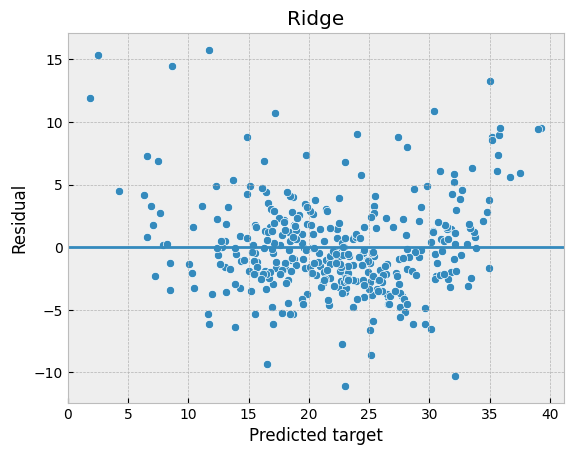

In [18]:
# residual plots
def residual_plots(model, X, y):

    model_name = type(model).__name__

    y_pred = model.predict(X.to_numpy())
    
    residual = y.to_numpy() - y_pred
    
    df_residual = pd.DataFrame({'x_axis' : y_pred,
                                'residual' : residual})
    
    # Plot the resiual
    plot = sns.scatterplot(data = df_residual, x = 'x_axis', y = 'residual')
    plot.set(xlabel = 'Predicted target', ylabel = 'Residual',
             title = model_name)
    plt.axhline(0)

    return residual
    
residual = residual_plots(ridge, X_train, y_train)

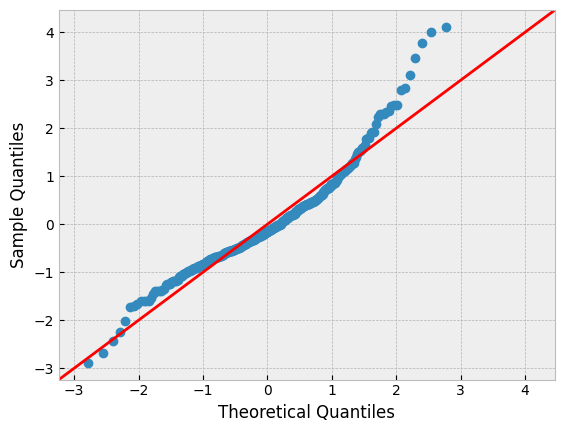

In [19]:
# QQplot to check normal distribution
def QQplot(residual):

    std_resid = StandardScaler().fit_transform(residual.reshape(-1,1))
    std_resid = np.array([value for nested_array in std_resid for value in nested_array])
    
    sm.qqplot(std_resid, line='45')
    plt.show()

QQplot(residual)

In [20]:
# evaluate model metrics, R-squared, RMSE, MAE, and MAPE
def model_evaluation(model, X, y, cols):

    y_pred = model.predict(X)

    r2 = r2_score(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    mae = mean_absolute_error(y, y_pred)
    mape = mean_absolute_percentage_error(y, y_pred)
    
    accuracy = pd.DataFrame({'R-squared' : r2,
                             'RMSE' : rmse, 
                             'MAE' : mae,
                             'MAPE' : mape}, index = [cols])
    return accuracy.T

def model_scores(model, X_train, y_train, X_test, y_test):

    model_name = type(model).__name__
    
    X = [X_train.to_numpy(), X_test.to_numpy()]
    y = [y_train.to_numpy(), y_test.to_numpy()]

    cols = ['Training', 'Test']

    scores = pd.DataFrame()
    for i in range(len(X)):
        accuracy = model_evaluation(model, X[i], y[i], cols[i] + ' '+ model_name)
        scores = pd.concat([scores, accuracy], axis=1)

    return scores

In [21]:
ridge_scores = model_scores(ridge, X_train, y_train, X_test, y_test)
ridge_scores

Training Ridge  Test Ridge
R-squared        0.771575    0.723120
RMSE             3.832683    3.746809
MAE              2.831733    2.895508
MAPE             0.146818    0.166332

### Lasso Regression

In [22]:
from sklearn.linear_model import Lasso

alpha = [0.01, 0.1, 1, 10]

#Lets get the best lambda for ridge regression model
for al in alpha:
    lasso = Lasso(alpha = al, random_state = 42)
    lasso.fit(X_train.to_numpy(), y_train.to_numpy())

    y_predict_lasso = lasso.predict(X_test.to_numpy())

    rmse_lasso = np.sqrt(mean_squared_error(y_test, y_predict_lasso))
    print('RMSE lasso for alpha : {}, is {}'.format(al, rmse_lasso))

RMSE lasso for alpha : 0.01, is 3.7523004215475866
RMSE lasso for alpha : 0.1, is 3.790981636375139
RMSE lasso for alpha : 1, is 4.281394387251769
RMSE lasso for alpha : 10, is 4.866580139480147


In [23]:
lasso = Lasso(alpha = 0.01, random_state = 42)
lasso.fit(X_train.to_numpy(), y_train.to_numpy())

Lasso(alpha=0.01, random_state=42)

In [24]:
coeficient(lasso, feature)

intercept  coefficient
0   intercept    27.954096
1        crim    -0.087310
2          zn     0.031053
3       indus    -0.118902
4        chas     0.205647
5         nox    -8.557909
6          rm     3.729499
7         age    -0.022483
8         dis    -1.255243
9         tax    -0.003054
10    ptratio    -0.718302
11      black     0.006637
12      lstat    -0.377886

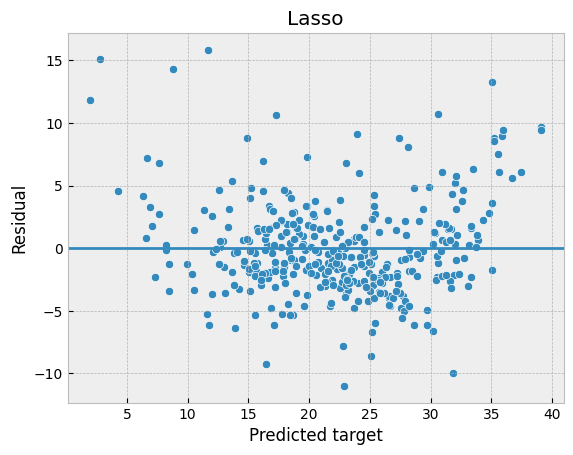

In [25]:
residual_lasso = residual_plots(lasso, X_train, y_train)

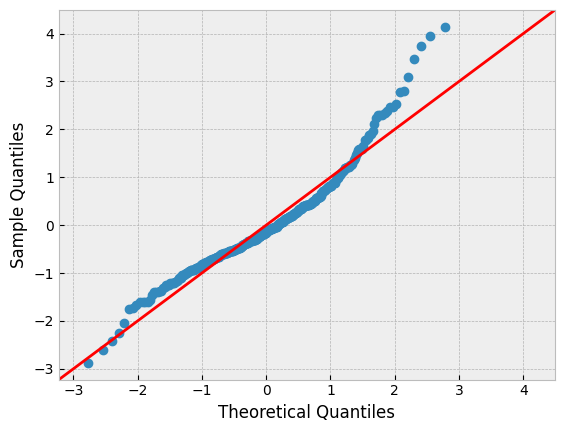

In [26]:
QQplot(residual_lasso)

In [27]:
lasso_scores = model_scores(lasso, X_train, y_train, X_test, y_test)
lasso_scores

Training Lasso  Test Lasso
R-squared        0.772514    0.722307
RMSE             3.824799    3.752300
MAE              2.824331    2.899340
MAPE             0.146203    0.166209

## PCA

In [71]:
# Using PCA (principal component analysis to reduce dimension
feature = feature.copy()
target = target.copy()

# scaling the value into unit variance
scaler = StandardScaler()
scaler.fit(feature)
df_std = scaler.transform(feature)

feature_scaling = pd.DataFrame(data = df_std, columns = feature.columns)
feature_scaling.head()

crim        zn     indus      chas       nox        rm       age  \
0 -0.417401  0.301813 -1.291856 -0.250812 -0.139895  0.505040 -0.109432   
1 -0.414992 -0.486924 -0.593329 -0.250812 -0.731821  0.269017  0.377488   
2 -0.414995 -0.486924 -0.593329 -0.250812 -0.731821  1.439934 -0.255152   
3 -0.414412 -0.486924 -1.310933 -0.250812 -0.826186  1.153335 -0.798939   
4 -0.410202 -0.486924 -1.310933 -0.250812 -0.826186  1.381694 -0.500390   

        dis       tax   ptratio     black     lstat  
0  0.121208 -0.667101 -1.527280  0.443535 -1.122679  
1  0.537330 -0.988734 -0.341504  0.443535 -0.534772  
2  0.537330 -0.988734 -0.341504  0.399553 -1.256937  
3  1.056878 -1.107857  0.085376  0.419005 -1.410980  
4  1.056878 -1.107857  0.085376  0.443535 -1.073216

In [73]:
# projected the already scaled data into feature and target
feature_pca = feature_scaling
target_pca = target

In [74]:
from sklearn.decomposition import PCA

# decide number of components by calculate variance ratio from 1 to len(feature.columns)
var_ratio = []
nums = np.arange(feature_pca.shape[1] + 1)
for num in nums:
    pca = PCA(n_components = num)
    pca.fit(feature_pca)
    var_ratio.append(np.sum(pca.explained_variance_ratio_))

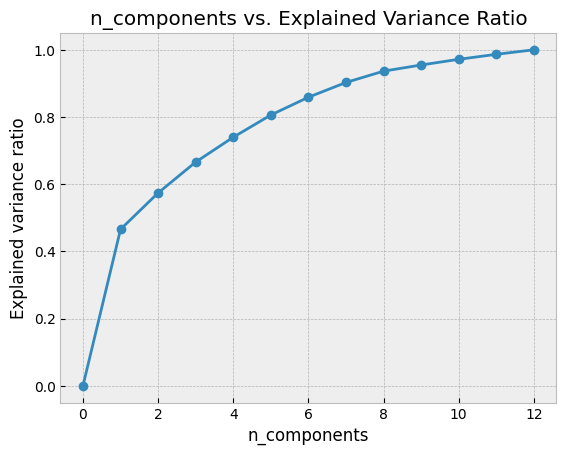

In [56]:
plt.plot(nums, var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')
plt.show()

In [57]:
# With n_components = 6, we have already capture 80% of the variance in the input dataset

pca = PCA(n_components=6)
pca.fit(feature_pca)
pca_transform = pca.transform(feature_pca)

X_pca = pd.DataFrame(data = pca_transform, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6'])
y_pca = target_pca.copy()

df_pca_transform = pd.concat([X_pca, y_pca], axis=1)
df_pca_transform.head()

pc1       pc2       pc3       pc4       pc5       pc6  medv
0 -1.910252  0.750437  0.563397 -0.427309 -0.983747  0.130670  24.0
1 -1.242074  0.482002 -0.536497 -0.560541 -0.192910 -0.276110  21.6
2 -1.941399  0.572305  0.241631 -1.319066  0.342074 -0.211589  34.7
3 -2.553407  0.085857 -0.133718 -1.079825  0.710108 -0.397275  33.4
4 -2.389733  0.171088 -0.072155 -1.136606  0.663643 -0.336148  36.2

In [58]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, 
                                                                    test_size=0.25, 
                                                                    random_state=42)

#Check the shape of the train, test, and validation data 

# feature and target shape
print('Feature PCA shape before split : {}'.format(feature_pca.shape))
print('Target PCA shape before split : {}'.format(target_pca.shape))
print()

# train shape, we take 75% from the original data
print('X_train PCA shape : {}'.format(X_train_pca.shape))
print('y_train PCA shape : {}'.format(y_train_pca.shape))
print()

# test shape, we take 25% from the original data
print('X_test PCA shape : {}'.format(X_test_pca.shape))
print('y_test PCA shape : {}'.format(y_test_pca.shape))
print()

Feature PCA shape before split : (490, 12)
Target PCA shape before split : (490,)

X_train PCA shape : (367, 6)
y_train PCA shape : (367,)

X_test PCA shape : (123, 6)
y_test PCA shape : (123,)



### Ridge Regression after doing PCA

In [59]:
alpha = [0.01, 0.1, 1, 10]

#Lets get the best lambda for ridge regression model
for al in alpha:
    ridge = Ridge(alpha = al, random_state = 42)
    ridge.fit(X_train_pca.to_numpy(), y_train_pca.to_numpy())

    y_predict_ridge = ridge.predict(X_test_pca.to_numpy())

    rmse_ridge = np.sqrt(mean_squared_error(y_test_pca, y_predict_ridge))
    print('RMSE ridge for alpha : {}, is {}'.format(al, rmse_ridge))

RMSE ridge for alpha : 0.01, is 3.80808756000808
RMSE ridge for alpha : 0.1, is 3.808089915503234
RMSE ridge for alpha : 1, is 3.8081210077329795
RMSE ridge for alpha : 10, is 3.809150632177626


In [60]:
ridge_pca = Ridge(alpha=0.01, random_state = 42)
ridge_pca.fit(X_train_pca, y_train_pca)

Ridge(alpha=0.01, random_state=42)

In [61]:
coeficient(ridge_pca, X_pca)

intercept  coefficient
0  intercept    21.815132
1        pc1    -2.380252
2        pc2     1.947163
3        pc3     1.939536
4        pc4    -2.269988
5        pc5    -0.014334
6        pc6     0.507085

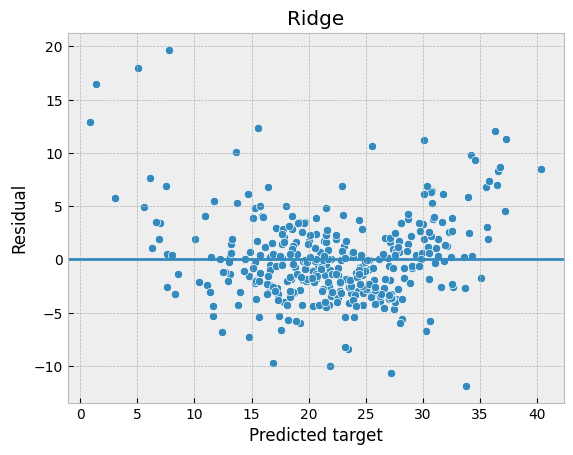

In [62]:
residual_ridge_pca = residual_plots(ridge_pca, X_train_pca, y_train_pca)

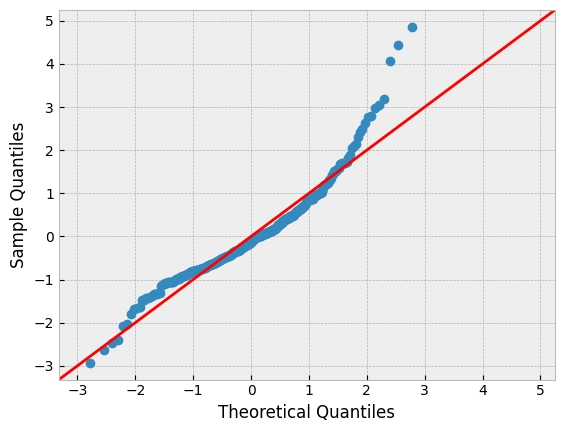

In [63]:
QQplot(residual_ridge_pca)

In [64]:
ridge_pca_scores = model_scores(ridge_pca, X_train_pca, y_train_pca, X_test_pca, y_test_pca)
ridge_pca_scores

Training Ridge  Test Ridge
R-squared        0.745015    0.713989
RMSE             4.049380    3.808088
MAE              2.938473    2.965288
MAPE             0.155202    0.173478

### Lasso Regression after doing PCA

In [65]:
alpha = [0.01, 0.1, 1, 10]

#Lets get the best lambda for ridge regression model
for al in alpha:
    lasso = Lasso(alpha = al, random_state = 42)
    lasso.fit(X_train_pca.to_numpy(), y_train_pca.to_numpy())

    y_predict_lasso = lasso.predict(X_test_pca.to_numpy())

    rmse_lasso = np.sqrt(mean_squared_error(y_test_pca, y_predict_lasso))
    print('RMSE lasso for alpha : {}, is {}'.format(al, rmse_lasso))

RMSE lasso for alpha : 0.01, is 3.8084036922741835
RMSE lasso for alpha : 0.1, is 3.8223507839397546
RMSE lasso for alpha : 1, is 4.082826849056574
RMSE lasso for alpha : 10, is 6.386543047373914


In [66]:
lasso_pca = Lasso(alpha = 0.01, random_state=42)
lasso_pca.fit(X_train_pca, y_train_pca)

Lasso(alpha=0.01, random_state=42)

In [67]:
coeficient(lasso_pca, X_pca)

intercept  coefficient
0  intercept    21.816822
1        pc1    -2.378678
2        pc2     1.940025
3        pc3     1.931325
4        pc4    -2.259912
5        pc5    -0.003242
6        pc6     0.489913

In [68]:
residual_lasso_pca = residual_plots(lasso_pca, X_train_pca, y_train_pca)

In [69]:
QQplot(residual_lasso_pca)

In [70]:
lasso_pca_scores = model_scores(lasso_pca, X_train_pca, y_train_pca, X_test_pca, y_test_pca)
lasso_pca_scores

Training Lasso  Test Lasso
R-squared        0.745006    0.713941
RMSE             4.049448    3.808404
MAE              2.939630    2.968754
MAPE             0.155180    0.173658